# Microtask 3
Produce a listing of repositories, as a table and as CSV file, with the number of commits authored, issues opened, and pull requests opened, during the last three months, ordered by the total number (commits plus issues plus pull requests).

## Project Under Analysis: Chaoss


In [1]:
from perceval.backends.core.git import Git
from perceval.backends.core.github import GitHub

import pandas as pd

import requests
import json

/home/utkarsh/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory: 'uname'
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


## Demonstrations
1. Sir Perceval's quest
2. Datetime tools
3. Pandas
4. Matplotlib
5. Grimoirelab enriched_index github

## Starter Code
First we shall demonstrate perceval's working using code from the gitbook.
Then we shall use this code which works on one repository to run on all repositories which we shall obtain using Git api

In [2]:
count=0
# url for the git repo to analyze
repo_url = 'http://github.com/grimoirelab/perceval.git'
# directory for letting Perceval clone the git repo
repo_dir = '/tmp/perceval.git'

# create a Git object, pointing to repo_url, using repo_dir for cloning
repo = Git(uri=repo_url, gitpath=repo_dir)
# fetch all commits as an iteratoir, and iterate it printing each hash
for commit in repo.fetch():
    count+=1
    print(commit['data']['commit'])
    if count==20: break

dc78c254e464ff334892e0448a23e4cfbfc637a3
57bc204822832a6c23ac7883e5392f4da6f4ca37
2355d18310d8e15c8e5d44f688d757df33b0e4be
589bc515db1632959f6edcb0c4bc2fe43ee51b74
35bfeb3c4037a31f4f6a885243f213a104772a04
f6238e73f5bba86efd5e5fdd55a84b2b4f7348ec
2ff7af1b6e5b202697518c307f4d4d68a5cb1b7b
4e34582f9cfd8ec64841d5db5333c598a4082632
b0f6eb81d9b1dc5f77dce9954744016dfbb3cb4a
47f9657b7e0cdb63c7c71aaba2edf0ce772145fe
740ca3d73893db8cf712b2dfff0df3af1600ae9b
d1253dd9876bb76e938a861acaceaae95241b46d
2534e534e24b71868b72c19107f787d5c8d690cf
0ad102623646fe165fe54798b190e7dfab73fedd
9b6bcf8bdbb3d261998a2231531d37cbd10d6c0b
525f43db7764d5f3cbc846fa3bf48a0c74550e4e
2f7428028f377104a301c7bc7ba92ae3acddfb5c
6c06ae24ac5512de3260f0c3cea615ba466bdf01
d87f2ed0d3d98832348602a8105bbccf5f812620
8cc0df2f3ffe92104160749ffe98e537f25977a0


## Step 1: Counting the number of commits

In [3]:
repo = Git(uri=repo_url, gitpath=repo_dir)
count = 0
for commit in repo.fetch():
    count += 1
print("Number of commmits: %d." % count)

Number of commmits: 1136.


## Step 2: Judging if its an issue or a pull request

In [4]:
# create a Git object, pointing to repo_url, using repo_dir for cloning
count=0
github_token = ''
repo = GitHub(owner='grimoirelab', repository='perceval', api_token=github_token)
# fetch all issues/pull requests as an iteratoir, and iterate it printing
# their number, and whether they are issues or pull requessts
for item in repo.fetch():
    count+=1
    if 'pull_request' in item['data']:
        kind = 'Pull request'
    else:
        kind = 'Issue'
    print(item['data']['number'], ':', kind)
    if count==20: break

3 : Pull request
5 : Pull request
4 : Pull request
2 : Pull request
6 : Pull request
8 : Issue
7 : Pull request
9 : Issue
15 : Pull request
14 : Pull request
11 : Pull request
10 : Pull request
17 : Issue
12 : Pull request
18 : Issue
19 : Issue
20 : Issue
21 : Issue
23 : Pull request
25 : Pull request


## Step 3: Handling the Commit Date and Time
We have a 3 month condition to satisfy.

In [8]:
from dateutil import parser
from datetime import datetime
repo = Git(uri=repo_url, gitpath=repo_dir)
# fetch all commits as an iteratoir, and iterate it printing each hash
for commit in repo.fetch():
    print("Date to use : " +commit['data']['CommitDate'])
    dt=parser.parse(commit['data']['CommitDate'])
    print("Datetime Object : "+str(dt))
    tz_info = dt.tzinfo
    diff=datetime.now(tz_info)-dt
    print("Differnce : "+str(diff.days))
    break

Date to use : Tue Aug 18 18:08:27 2015 +0200
Datetime Object : 2015-08-18 18:08:27+02:00
Differnce : 949


## Step 4: Obtaining our list of repositories
We shall be using requests to obtain a json from the Git api which we shall parse.

In [9]:
#Feel free to change the name to check for other organisations
organisation="chaoss"
to_parse=requests.get('https://api.github.com/users/'+organisation+'/repos').json()

## JSON to parse
Let us print an entry to have a better idea of what all fields are available. The primary fields we shall be using have already been stated in the above steps.

In [10]:
import pprint as pp
pp.pprint(to_parse[1])

{'archive_url': 'https://api.github.com/repos/chaoss/grimoirelab/{archive_format}{/ref}',
 'archived': False,
 'assignees_url': 'https://api.github.com/repos/chaoss/grimoirelab/assignees{/user}',
 'blobs_url': 'https://api.github.com/repos/chaoss/grimoirelab/git/blobs{/sha}',
 'branches_url': 'https://api.github.com/repos/chaoss/grimoirelab/branches{/branch}',
 'clone_url': 'https://github.com/chaoss/grimoirelab.git',
 'collaborators_url': 'https://api.github.com/repos/chaoss/grimoirelab/collaborators{/collaborator}',
 'comments_url': 'https://api.github.com/repos/chaoss/grimoirelab/comments{/number}',
 'commits_url': 'https://api.github.com/repos/chaoss/grimoirelab/commits{/sha}',
 'compare_url': 'https://api.github.com/repos/chaoss/grimoirelab/compare/{base}...{head}',
 'contents_url': 'https://api.github.com/repos/chaoss/grimoirelab/contents/{+path}',
 'contributors_url': 'https://api.github.com/repos/chaoss/grimoirelab/contributors',
 'created_at': '2017-09-20T11:09:15Z',
 'default

## Step 5: Putting it all together

In [30]:
a_list=[]
b_list=[]
c_list=[]
d_list=[]
e_list=[]
#Lists because appending in pandas directly is expensive
for item in to_parse:
    a_list.append(item['name'])
    commits=0
    repo_git = Git(uri=item['html_url'], gitpath='/tmp/'+item['name'])
    for commit in repo_git.fetch():
        dt=parser.parse(commit['data']['CommitDate'])
        tz_info = dt.tzinfo
        diff=datetime.now(tz_info)-dt
        if diff.days <=90:
            commits+=1
    b_list.append(commits)
    issues=0
    pull_requests=0
    repo_github = GitHub(owner=organisation, repository=item['name'], api_token=github_token)
    for item2 in repo_github.fetch():
        dt=parser.parse(item2['data']['created_at'])
        tz_info = dt.tzinfo
        diff=datetime.now(tz_info)-dt
        if diff.days <=90:
            if 'pull_request' in item2['data']:
                pull_requests+=1
            else :
                issues+=1
    c_list.append(issues)
    d_list.append(pull_requests)
    total=commits+issues+pull_requests
    e_list.append(total)
df = pd.DataFrame({'Repository': a_list, 'Commits': b_list,'Issues': c_list, 'Pull Requests': d_list,'Total': e_list})

In [34]:
df=df.sort(['Total'], ascending=True).reset_index(drop=True)
df

/home/utkarsh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,Commits,Issues,Pull Requests,Repository,Total
0,0,3,0,prospector,3
1,6,2,4,whitepaper,12
2,16,1,5,grimoirelab-toolkit,22
3,15,2,6,grimoirelab-kidash,23
4,18,1,7,grimoirelab-cereslib,26
5,16,3,8,wg-diversity-inclusion,27
6,10,10,12,grimoirelab-manuscripts,32
7,23,2,8,grimoirelab-perceval-puppet,33
8,24,1,8,grimoirelab-perceval-opnfv,33
9,20,6,10,grimoirelab-sigils,36


In [35]:
df.to_csv('MTask3.csv',index=True)

In [49]:
import matplotlib.pyplot as plt
graph = df.plot(x=df['Repository'],kind='bar',figsize=(24,18), fontsize=18,legend=True)

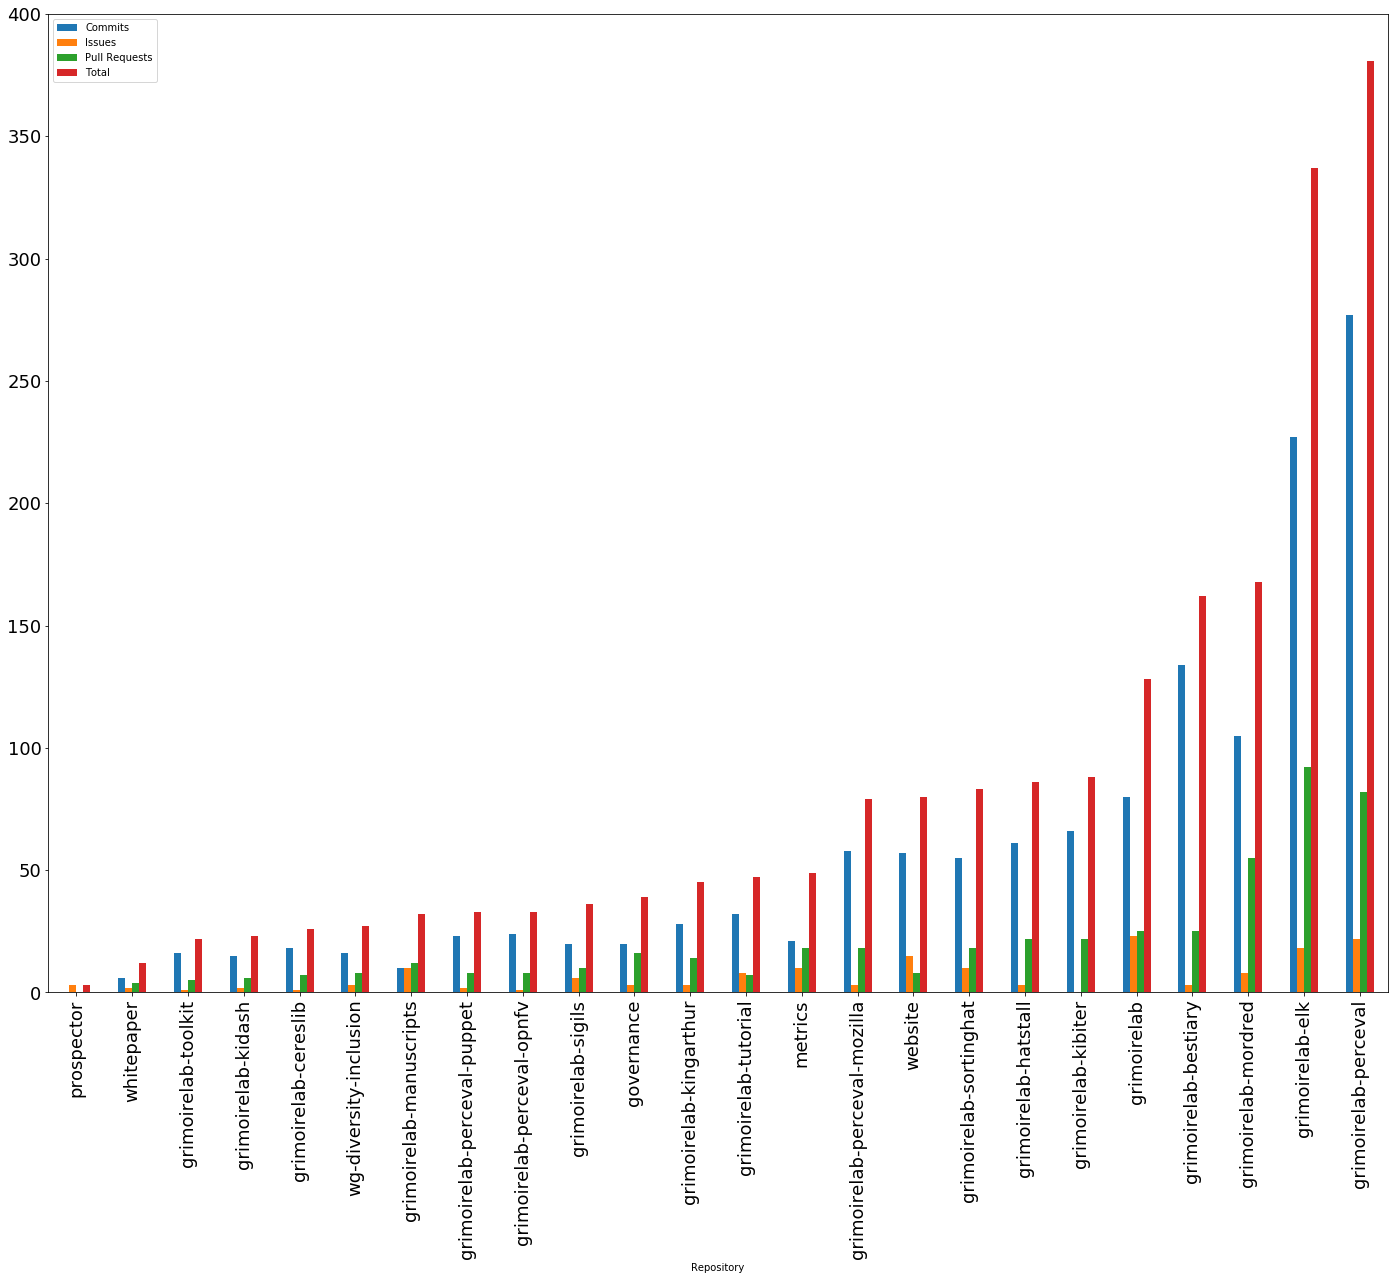

In [50]:
plt.show()